In [4]:
import pandas as pd

In [6]:
df = pd.DataFrame(pd.read_pickle('x_scaled.pickle'))

In [7]:
print(df.head())
print(df.shape)

         0         1    2    3    4    5    6    7    8    9    10   11   12  \
0  0.833333  0.019103  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.666667  0.126231  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.666667  0.178560  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.500000  0.344442  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4  0.333333  0.008637  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    13   14   15   16  
0  0.0  0.0  1.0  0.0  
1  0.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  
(3100, 17)


In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

In [10]:
df_plot = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

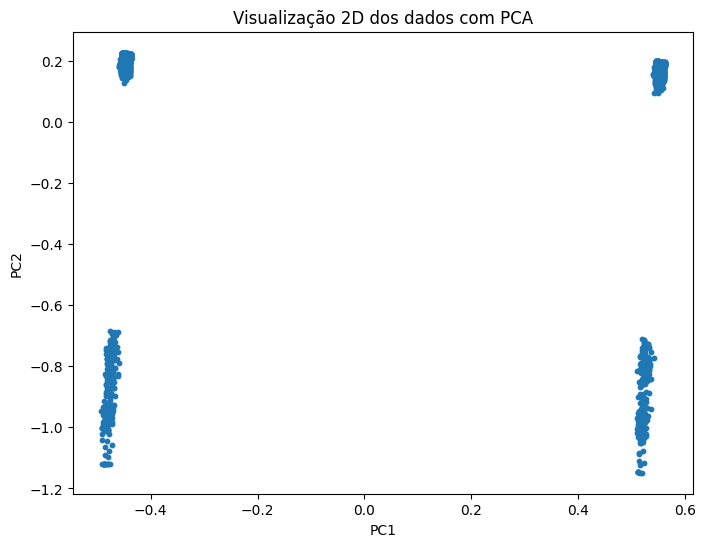

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df_plot['PC1'], df_plot['PC2'], s=10)
plt.title("Visualização 2D dos dados com PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [13]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_plot)
distances, indices = neighbors_fit.kneighbors(df_plot)

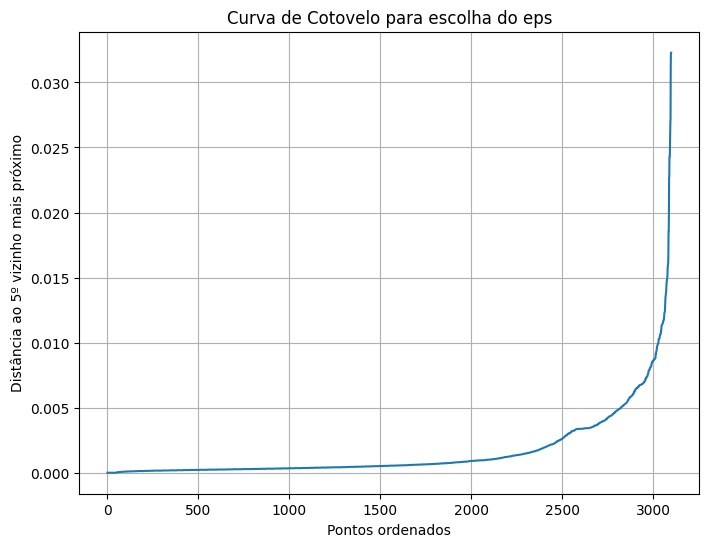

In [14]:
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title("Curva de Cotovelo para escolha do eps")
plt.xlabel("Pontos ordenados")
plt.ylabel("Distância ao 5º vizinho mais próximo")
plt.grid(True)
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_plot)

In [17]:
df_plot['Cluster'] = labels

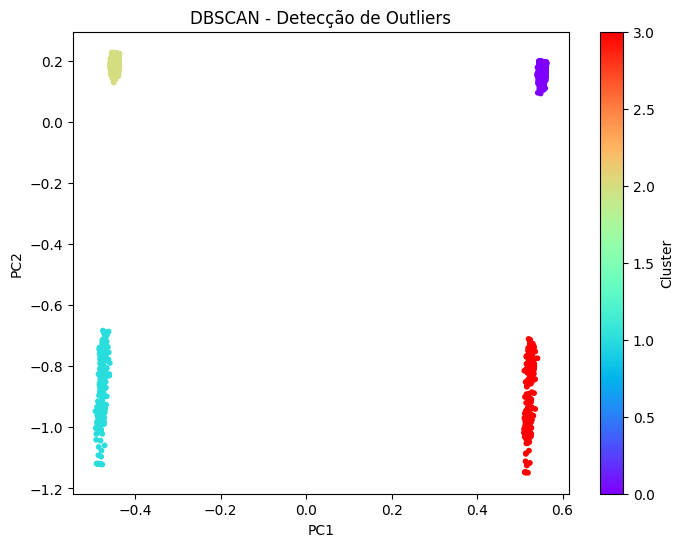

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(df_plot['PC1'], df_plot['PC2'], c=df_plot['Cluster'], cmap='rainbow', s=10)
plt.title("DBSCAN - Detecção de Outliers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

In [19]:
outliers = df_plot[df_plot['Cluster'] == -1]
print(f"Total de outliers detectados: {len(outliers)}")

Total de outliers detectados: 0
